In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import re
import sys 
import random
import shutil
from pathlib import Path
import math
import time
from torch import nn

In [2]:
# Connect Google Drive to a Google Colab Notebook for Dataset
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
required_classes_list = ["A041", "A042", "A043", "A044", "A045", "A046", "A047", "A048", "A049", "A103", "A104", "A105"]

In [4]:
def is_path_exists(path):
    if(os.path.exists(path)):
        return True
    else:
        return False

In [5]:
def ls(path):
    """
    path: path of required directory, want to know name of sub-directories
    """
    if (is_path_exists(path)):
        return os.listdir(path)

In [6]:
for req in required_classes_list:
  print(len(ls("/content/gdrive/MyDrive/npy_dataset/" + req)))


948
948
946
946
947
948
948
946
946
958
959
958


In [7]:
path = '/content/gdrive/MyDrive/npy_dataset/'

In [8]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
def correct_path_maker(path):
    if(path[-1] == "/"):
        return path
    else:
        return path + "/"

In [10]:
def is_path_exists(path):
    if(os.path.exists(path)):
        return True
    else:
        return False

In [11]:
def directory_maker(destination, name):
    """
    destination: Directory path in which sub-directory required
    name: name to set for required sub-directory
    """
    path = correct_path_maker(destination)
    if(is_path_exists(destination)):
        if (is_path_exists(path + name)):
            pass
        else:
            os.mkdir(destination + name)            
    else:
        assert "Wrong directory path!"

In [12]:
# Setup path to data folder
original_dataset_path = Path(path)
data_path = Path("data/")
image_path = data_path / "ntu"
train_path = image_path / "train"
test_path = image_path / "test"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    train_path.mkdir(parents=True, exist_ok=True)
    test_path.mkdir(parents=True, exist_ok=True)

Did not find data/ntu directory, creating one...


In [13]:
original_dataset_path

PosixPath('/content/gdrive/MyDrive/npy_dataset')

In [14]:
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(original_dataset_path.glob("*/*.npy"))
print("Total dataset: {}".format(len(image_path_list)))
# 2. Get random image path

sample_dataset_data_paths = []
for p in range(7000):
  random_image_path = random.choice(image_path_list)
  sample_dataset_data_paths.append(random_image_path)

sample_dataset_data_paths[:10]

Total dataset: 11398


[PosixPath('/content/gdrive/MyDrive/npy_dataset/A042/S001C003P008R001A042.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A105/S030C002P044R002A105.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A048/S006C003P015R002A048.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A043/S011C001P019R001A043.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A043/S002C002P007R001A043.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A104/S029C003P006R002A104.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A045/S006C001P023R002A045.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A105/S028C003P043R002A105.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A042/S012C002P019R001A042.skeleton.npy'),
 PosixPath('/content/gdrive/MyDrive/npy_dataset/A047/S006C001P023R001A047.skeleton.npy')]

In [15]:
data = np.load(sample_dataset_data_paths[0] ,allow_pickle=True).item()

In [16]:
data.keys()

dict_keys(['file_name', 'nbodys', 'njoints', 'skel_body0', 'rgb_body0', 'depth_body0'])

In [17]:
data['file_name']

'S001C003P008R001A042'

In [18]:
np.max(data['nbodys'])

1

In [19]:
data['njoints']

25

In [20]:
data['skel_body0'].shape

(101, 25, 3)

In [21]:
data['skel_body0'][0]

array([[-0.2826986 , -0.09106869,  2.859332  ],
       [-0.2884412 ,  0.1988509 ,  2.783488  ],
       [-0.2922149 ,  0.4829376 ,  2.697171  ],
       [-0.2824327 ,  0.6297002 ,  2.670836  ],
       [-0.4476094 ,  0.3705133 ,  2.685134  ],
       [-0.4911785 ,  0.1189251 ,  2.735077  ],
       [-0.4752555 , -0.101491  ,  2.737291  ],
       [-0.4559527 , -0.1353378 ,  2.742711  ],
       [-0.1302568 ,  0.3808235 ,  2.759353  ],
       [-0.1044609 ,  0.1314732 ,  2.851672  ],
       [-0.1031008 , -0.08938175,  2.826586  ],
       [-0.1198242 , -0.1235478 ,  2.822681  ],
       [-0.3509256 , -0.09075852,  2.811033  ],
       [-0.394318  , -0.3566556 ,  2.901912  ],
       [-0.4089076 , -0.6394552 ,  3.060566  ],
       [-0.3544897 , -0.708465  ,  3.055014  ],
       [-0.2074436 , -0.08920889,  2.836946  ],
       [-0.2164447 , -0.3541111 ,  2.969515  ],
       [-0.2537433 , -0.6325541 ,  3.102932  ],
       [-0.2277633 , -0.69616   ,  2.985495  ],
       [-0.291533  ,  0.4129205 ,  2.720

In [22]:
data['rgb_body0'].shape

(101, 25, 2)

In [23]:
data['rgb_body0'][0]

array([[869.3655, 573.3937],
       [864.4468, 463.8788],
       [859.6267, 349.6107],
       [862.3337, 289.2538],
       [797.8704, 393.4209],
       [784.1978, 493.8024],
       [790.84  , 579.2386],
       [798.6921, 592.2195],
       [924.2528, 393.0323],
       [935.1747, 490.5115],
       [935.8083, 572.9025],
       [929.5418, 585.8018],
       [842.126 , 573.9611],
       [830.0903, 670.1087],
       [831.7778, 761.4174],
       [850.5479, 785.7291],
       [896.8497, 572.8621],
       [896.5286, 665.9467],
       [886.564 , 755.7635],
       [893.1935, 786.8829],
       [860.8283, 378.6071],
       [801.7047, 620.2021],
       [814.2714, 593.5204],
       [930.7133, 613.1408],
       [942.1938, 583.1951]])

In [24]:
data['depth_body0'].shape

(101, 25, 2)

In [25]:
data['depth_body0'][0]

array([[226.4184, 221.3751],
       [224.6647, 183.6309],
       [222.8588, 144.1649],
       [223.7542, 123.2719],
       [201.474 , 159.1945],
       [196.8114, 193.8263],
       [199.0057, 223.307 ],
       [201.713 , 227.7939],
       [245.2771, 159.2787],
       [249.1632, 192.908 ],
       [249.2215, 221.2834],
       [247.0384, 225.7199],
       [216.9091, 221.5404],
       [212.808 , 254.719 ],
       [213.552 , 286.3431],
       [219.9799, 294.7921],
       [235.8343, 221.2231],
       [235.8901, 253.3348],
       [232.5793, 284.4207],
       [234.5681, 295.2264],
       [223.3193, 154.1932],
       [202.731 , 237.4557],
       [207.0312, 228.2572],
       [247.4291, 235.1448],
       [251.3687, 224.837 ]])

In [26]:
data['skel_body0'][0][:20]

array([[-0.2826986 , -0.09106869,  2.859332  ],
       [-0.2884412 ,  0.1988509 ,  2.783488  ],
       [-0.2922149 ,  0.4829376 ,  2.697171  ],
       [-0.2824327 ,  0.6297002 ,  2.670836  ],
       [-0.4476094 ,  0.3705133 ,  2.685134  ],
       [-0.4911785 ,  0.1189251 ,  2.735077  ],
       [-0.4752555 , -0.101491  ,  2.737291  ],
       [-0.4559527 , -0.1353378 ,  2.742711  ],
       [-0.1302568 ,  0.3808235 ,  2.759353  ],
       [-0.1044609 ,  0.1314732 ,  2.851672  ],
       [-0.1031008 , -0.08938175,  2.826586  ],
       [-0.1198242 , -0.1235478 ,  2.822681  ],
       [-0.3509256 , -0.09075852,  2.811033  ],
       [-0.394318  , -0.3566556 ,  2.901912  ],
       [-0.4089076 , -0.6394552 ,  3.060566  ],
       [-0.3544897 , -0.708465  ,  3.055014  ],
       [-0.2074436 , -0.08920889,  2.836946  ],
       [-0.2164447 , -0.3541111 ,  2.969515  ],
       [-0.2537433 , -0.6325541 ,  3.102932  ],
       [-0.2277633 , -0.69616   ,  2.985495  ]])

In [27]:
data['skel_body0'].shape[0]

101

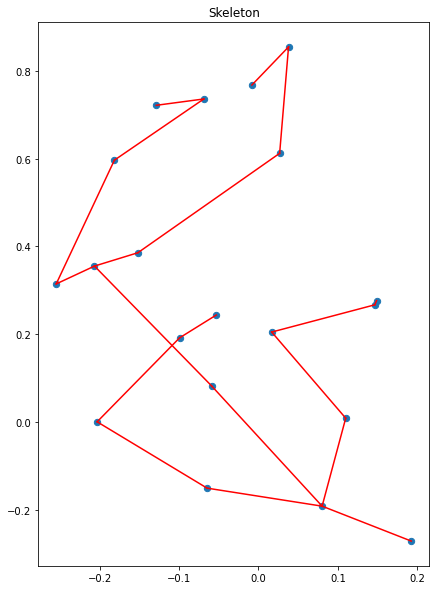

In [28]:
import matplotlib.pyplot as plt
import numpy as np


movement = data['skel_body0'][70][:20]
# print(movement)
bone_list = [[1, 2], [1, 17], [1, 13], [17, 18], [18, 19], [19, 20], [13, 14],
            [14, 15], [15, 16], [2, 3], [3, 9], [3, 5], [3, 4],
            [5, 6], [9, 10], [10, 11], [11, 12], [6, 7], [7, 8]]

bone_list = np.array(bone_list) - 1
number_of_postures = int(len(movement)/20)

for i in range(number_of_postures):
    fig, ax = plt.subplots(1, figsize=(7, 10))
    plt.title('Skeleton')
    # plt.xlim(100, 180)
    # plt.ylim(-250, 0)
    skeleton = movement[i*20:(i+1)*20]

    x = skeleton[:, 0]
    y = -skeleton[:, 1]

    sc = ax.scatter(x, y, s=40)
    for bone in bone_list:
        ax.plot([x[bone[0]], x[bone[1]]], [y[bone[0]], y[bone[1]]], 'r')
  

In [28]:
body = data['skel_body0'][:, :20]
body.shape[0]

101

In [29]:
body[100][1:] - body[100][0]

array([[-0.0845862 ,  0.2791454 , -0.055929  ],
       [-0.1679732 ,  0.5474435 , -0.129974  ],
       [-0.2431113 ,  0.6760141 , -0.102601  ],
       [-0.2437842 ,  0.3968625 , -0.072229  ],
       [-0.2320859 ,  0.17396225, -0.093325  ],
       [-0.1987716 , -0.0323754 , -0.176454  ],
       [-0.1821045 , -0.09605   , -0.189953  ],
       [-0.0018789 ,  0.4943435 , -0.18033   ],
       [ 0.1652255 ,  0.3434796 , -0.198937  ],
       [ 0.1514564 ,  0.13630225, -0.287196  ],
       [ 0.1257469 ,  0.0726921 , -0.298464  ],
       [-0.0616787 , -0.0087335 , -0.011006  ],
       [-0.1446715 , -0.2675363 ,  0.013241  ],
       [-0.2080085 , -0.4832106 ,  0.184956  ],
       [-0.2357755 , -0.5472511 ,  0.072469  ],
       [ 0.0695711 ,  0.0130681 , -0.05893   ],
       [ 0.1411151 , -0.2534851 , -0.045921  ],
       [ 0.1465941 , -0.5246725 ,  0.117476  ],
       [ 0.1149208 , -0.5879972 ,  0.004703  ]])

In [30]:
# mat = np.zeros([19,3])
# print(mat)
# for i in range(body.shape[0]):
#   mat = np.dstack((mat, body[i][1:] - body[:, 0][i]))
#   print(mat)
#   # print(body[i][1:] - body[:, 0][i])
#   # pass

In [31]:
# mat[:,:,101]

In [32]:
# body.shape

In [33]:
# mat = mat.permute(1, 2, 0)

In [34]:
# body11 = np.empty([19, 3])
# print(body11)
# for i in range(body.shape[0]):
#   if i == 0:
#     body1 = body[0][1:] - body[:,0][0]
#     body11 = body1.copy()
#   else:
#     body2 = body[i][1:] - body[:,0][i]
#     np.stack((body11,body2),axis=0)
#   # print(body1)

In [35]:
# body2

In [36]:
# body[:][:] - body[0][0]

In [37]:
# body = body[:][1:] - body[:][0]

In [38]:
# body[0]

In [40]:
train = sample_dataset_data_paths[:5500]
test = sample_dataset_data_paths[5500:]

In [41]:
len(train), len(test)

(5500, 1500)

In [42]:
destination = '/content/data/'
directory_maker(destination , "temp")
for source_path in train:
  shutil.copy(source_path, destination + "temp")

In [43]:
destination = '/content/data/'
directory_maker(destination , "temp1")
for source_path in test:
  shutil.copy(source_path, destination + "temp1")

In [44]:
def helper(source, destination):
    skeleton_file_names = ls(correct_path_maker(source))
    print(len(skeleton_file_names))
    for req_classes in required_classes_list:
        print(req_classes)
        directory_maker(correct_path_maker(destination), req_classes)
    
        if (os.path.exists(correct_path_maker(destination) + req_classes)):
            print(correct_path_maker(destination) + req_classes)
    #         print(os.path.exists(source))
            pattern = '.*({})'.format(req_classes)
            print(pattern)
            print(req_classes)
            required_files_name = [x for x in skeleton_file_names if re.match(pattern, x)]
            print(len(required_files_name))
            for skel in required_files_name:
                shutil.copy(correct_path_maker(source) + skel, correct_path_maker(destination) + req_classes)

In [45]:
helper('/content/data/temp', '/content/data/ntu/train')

4372
A041
/content/data/ntu/train/A041
.*(A041)
A041
350
A042
/content/data/ntu/train/A042
.*(A042)
A042
415
A043
/content/data/ntu/train/A043
.*(A043)
A043
360
A044
/content/data/ntu/train/A044
.*(A044)
A044
367
A045
/content/data/ntu/train/A045
.*(A045)
A045
360
A046
/content/data/ntu/train/A046
.*(A046)
A046
362
A047
/content/data/ntu/train/A047
.*(A047)
A047
377
A048
/content/data/ntu/train/A048
.*(A048)
A048
340
A049
/content/data/ntu/train/A049
.*(A049)
A049
353
A103
/content/data/ntu/train/A103
.*(A103)
A103
371
A104
/content/data/ntu/train/A104
.*(A104)
A104
335
A105
/content/data/ntu/train/A105
.*(A105)
A105
382


In [46]:
helper('/content/data/temp1', '/content/data/ntu/test')

1390
A041
/content/data/ntu/test/A041
.*(A041)
A041
123
A042
/content/data/ntu/test/A042
.*(A042)
A042
115
A043
/content/data/ntu/test/A043
.*(A043)
A043
119
A044
/content/data/ntu/test/A044
.*(A044)
A044
114
A045
/content/data/ntu/test/A045
.*(A045)
A045
112
A046
/content/data/ntu/test/A046
.*(A046)
A046
110
A047
/content/data/ntu/test/A047
.*(A047)
A047
139
A048
/content/data/ntu/test/A048
.*(A048)
A048
110
A049
/content/data/ntu/test/A049
.*(A049)
A049
117
A103
/content/data/ntu/test/A103
.*(A103)
A103
105
A104
/content/data/ntu/test/A104
.*(A104)
A104
123
A105
/content/data/ntu/test/A105
.*(A105)
A105
103


In [47]:
!zip -r /content/ntu.zip /content/data/ntu

Streaming output truncated to the last 5000 lines.
  adding: content/data/ntu/train/A045/S012C003P015R002A045.skeleton.npy (deflated 30%)
  adding: content/data/ntu/train/A045/S010C002P025R001A045.skeleton.npy (deflated 29%)
  adding: content/data/ntu/train/A045/S013C001P019R001A045.skeleton.npy (deflated 29%)
  adding: content/data/ntu/train/A045/S016C002P007R002A045.skeleton.npy (deflated 29%)
  adding: content/data/ntu/train/A045/S007C003P026R002A045.skeleton.npy (deflated 28%)
  adding: content/data/ntu/train/A045/S014C002P027R001A045.skeleton.npy (deflated 28%)
  adding: content/data/ntu/train/A045/S007C002P007R002A045.skeleton.npy (deflated 30%)
  adding: content/data/ntu/train/A045/S005C002P021R002A045.skeleton.npy (deflated 29%)
  adding: content/data/ntu/train/A045/S010C003P019R001A045.skeleton.npy (deflated 28%)
  adding: content/data/ntu/train/A045/S017C001P008R002A045.skeleton.npy (deflated 30%)
  adding: content/data/ntu/train/A045/S003C003P018R002A045.skeleton.npy (deflat

In [48]:
from google.colab import files
files.download('/content/ntu.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>